# Exploring conventional netCDF diag files

In [3]:
from pyGSI.diags import Conventional
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Read the file using PyGSI

In [4]:
diagFilePath = './diag_conv_t_ges.2024031812.nc4'
diag = Conventional(diagFilePath)

In [5]:
diag_dict = diag.__dict__
diag_dict['obs_ids']

array([133, 131, 180, 181, 187, 188, 120, 195, 130, 194, 193, 183, 192,
       126, 134], dtype=int32)

Get data from the file using PyGSI

In [6]:
# Reset indices when reading in, I don't understand why these indices were set or what purpose 
# they serve but they were making some things more difficult so lets reset them
data = diag.get_data().reset_index()

In [7]:
data

,Station_ID,Observation_Class,Observation_Type,Observation_Subtype,Pressure,Height,Analysis_Use_Flag,latitude,longitude,station_elevation,...,errinv_final,observation,omf_adjusted,omf_unadjusted,data_pof,data_vertical_velocity,dominant_sfc_type,model_terrain,hofx_unadjusted,hofx_adjusted
0,NLOYR3BA,t,133,0,238.399994,10668.0,1.0,3.083000,202.462006,10668.0,...,1.130850e+00,232.149994,0.764870,0.764870,-9.990000e+09,-9.990000e+09,0.0,0.0,231.385117,231.385117
1,PPSAPQJA,t,133,0,206.500000,11582.0,1.0,7.012000,199.987000,11582.0,...,1.081445e+00,225.149994,1.653118,1.653118,-9.990000e+09,-9.990000e+09,0.0,0.0,223.496872,223.496872
2,EH5SSIJA,t,133,0,206.500000,11582.0,1.0,11.715000,198.373001,11582.0,...,1.081445e+00,226.149994,2.252426,2.252426,-9.990000e+09,-9.990000e+09,0.0,0.0,223.897568,223.897568
3,AU0332,t,131,0,219.300003,11200.0,1.0,9.415200,197.984207,11200.0,...,1.091483e+00,227.149994,0.339865,0.339865,-9.990000e+09,-9.990000e+09,0.0,0.0,226.810135,226.810135
4,AU0332,t,131,0,209.199997,11500.0,1.0,8.791900,197.248703,11500.0,...,1.068424e+00,224.649994,-0.110163,-0.110163,-9.990000e+09,-9.990000e+09,0.0,0.0,224.760162,224.760162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95286,C3583,t,188,0,1017.000000,14.0,1.0,43.470501,356.220490,14.0,...,1.523826e+00,288.750000,1.462522,1.362427,-9.990000e+09,-9.990000e+09,0.0,0.0,287.387573,287.287476
95287,D9120,t,188,0,1013.799988,50.0,-1.0,43.477329,352.668671,50.0,...,2.938736e-39,205.350006,-81.465019,-81.437431,-9.990000e+09,-9.990000e+09,0.0,0.0,286.787445,286.815033
95288,AS353,t,188,0,1015.299988,17.0,1.0,43.537998,354.376160,17.0,...,1.240138e+00,288.750000,1.823937,1.760007,-9.990000e+09,-9.990000e+09,0.0,0.0,286.989990,286.926056
95289,AS353,t,188,0,1015.200012,17.0,1.0,43.537998,354.376160,17.0,...,1.228414e+00,288.750000,1.823937,1.767725,-9.990000e+09,-9.990000e+09,0.0,0.0,286.982269,286.926056


Change value for not assimilated to 0 from -1 for ease of computing totals and proportions

In [8]:
# (side note) Both lines work but the top will stop working, the bottom is the way to go
# data['Analysis_Use_Flag'][data['Analysis_Use_Flag'] == -1] = 0
data.loc[data['Analysis_Use_Flag'] == -1, 'Analysis_Use_Flag'] = 0

Group by Observation Type and take the mean, since we changed -1 to 0, the grouped mean will be the proportion assimilated

In [9]:
prop_assim_by_obs_type = pd.DataFrame(data.groupby('Observation_Type')['Analysis_Use_Flag'].mean())
# prop_assim_by_obs_type

Text(0.5, 1.0, 'Prop. Assimilated by Obs Type')

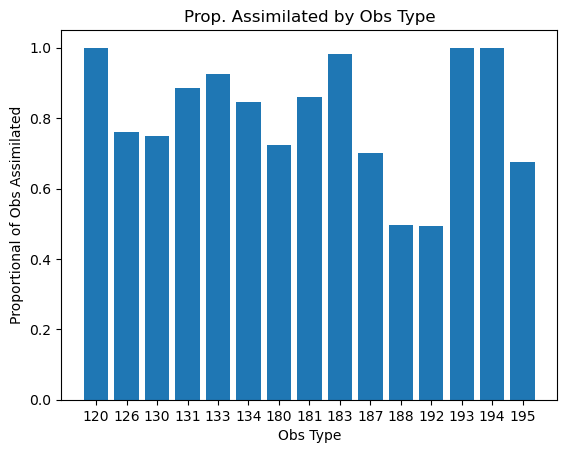

In [10]:
# Create the bar plot
plt.bar(range(len(prop_assim_by_obs_type['Analysis_Use_Flag'])), prop_assim_by_obs_type['Analysis_Use_Flag'], tick_label=prop_assim_by_obs_type.index)

# Add labels and title as necessary
plt.xlabel('Obs Type')
plt.ylabel('Proportional of Obs Assimilated')
plt.title('Prop. Assimilated by Obs Type')

## Some basic histograms

In [11]:
omf_adjusted = data['omf_adjusted']

n: 95291
mean: 0.037141505628824234
std: 2.5020697116851807
max: 64.7065658569336
min: -89.25696563720703
binsize:  0.4987603508579955


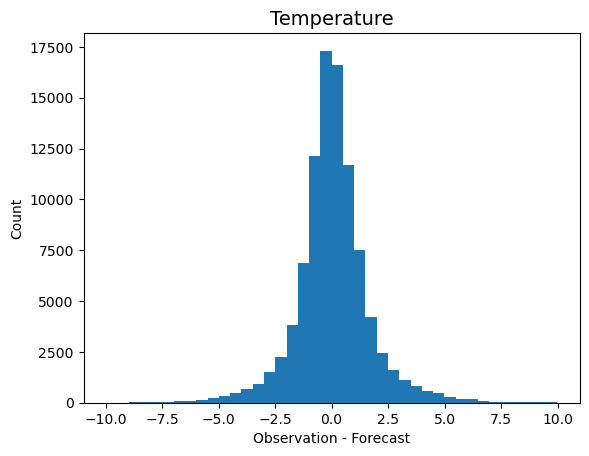

In [12]:
# Get basic statistics using numpy
n = len(omf_adjusted)
mean = np.mean(omf_adjusted)
std = np.std(omf_adjusted)
mx = np.max(omf_adjusted)
mn = np.min(omf_adjusted)

print(f'n: {n}\nmean: {mean}\nstd: {std}\nmax: {mx}\nmin: {mn}')

# Make proper bin sizes using the equation max-min/sqrt(n). Then
# extend the bin range to 4x the standard deviation
binsize = (mx-mn)/np.sqrt(n)
print('binsize: ', binsize)
bins = np.arange(mean-(4*std),mean+(4*std),binsize)

# Now plot figure
fig = plt.figure()
plt.hist(omf_adjusted, bins=bins)

# Add labels
plt.xlabel('Observation - Forecast')
plt.ylabel('Count')
plt.title('Temperature', fontsize=14)

plt.show()

In [13]:
observation = data['observation']

In [14]:
observation

0        232.149994
1        225.149994
2        226.149994
3        227.149994
4        224.649994
            ...    
95286    288.750000
95287    205.350006
95288    288.750000
95289    288.750000
95290    285.350006
Name: observation, Length: 95291, dtype: float32

n: 95291
mean: 271.41888427734375
std: 18.139617919921875
max: 343.1499938964844
min: 191.64999389648438
binsize:  0.4907798127367713


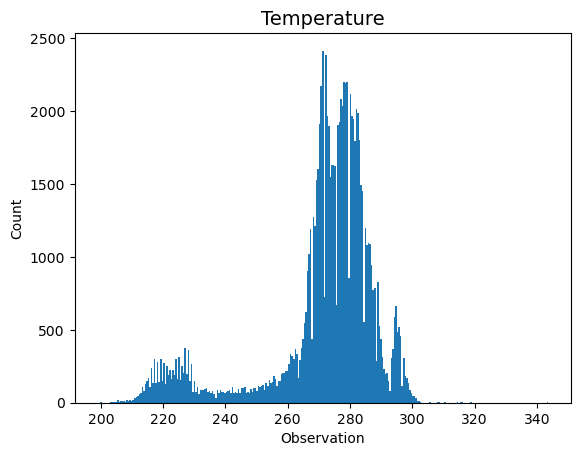

In [15]:
# Get basic statistics using numpy
n = len(observation)
mean = np.mean(observation)
std = np.std(observation)
mx = np.max(observation)
mn = np.min(observation)

print(f'n: {n}\nmean: {mean}\nstd: {std}\nmax: {mx}\nmin: {mn}')

# Make proper bin sizes using the equation max-min/sqrt(n). Then
# extend the bin range to 4x the standard deviation
binsize = (mx-mn)/np.sqrt(n)
print('binsize: ', binsize)
bins = np.arange(mean-(4*std),mean+(4*std),binsize)

# Now plot figure
fig = plt.figure()
plt.hist(observation, bins=bins)

# Add labels
plt.xlabel('Observation')
plt.ylabel('Count')
plt.title('Temperature', fontsize=14)

plt.show()

## Spatial Plots

In [16]:
obs_ids = [181, 187, 281, 287]
data_surface = pd.DataFrame.reset_index(diag.get_data(obsid=obs_ids))

In [17]:
print(np.unique(data_surface['Observation_Type']))
print(len(data_surface))

[181 187]
4664


In [18]:
lats = data_surface['latitude']
lons = data_surface['longitude']
surface_obs = data_surface['observation']

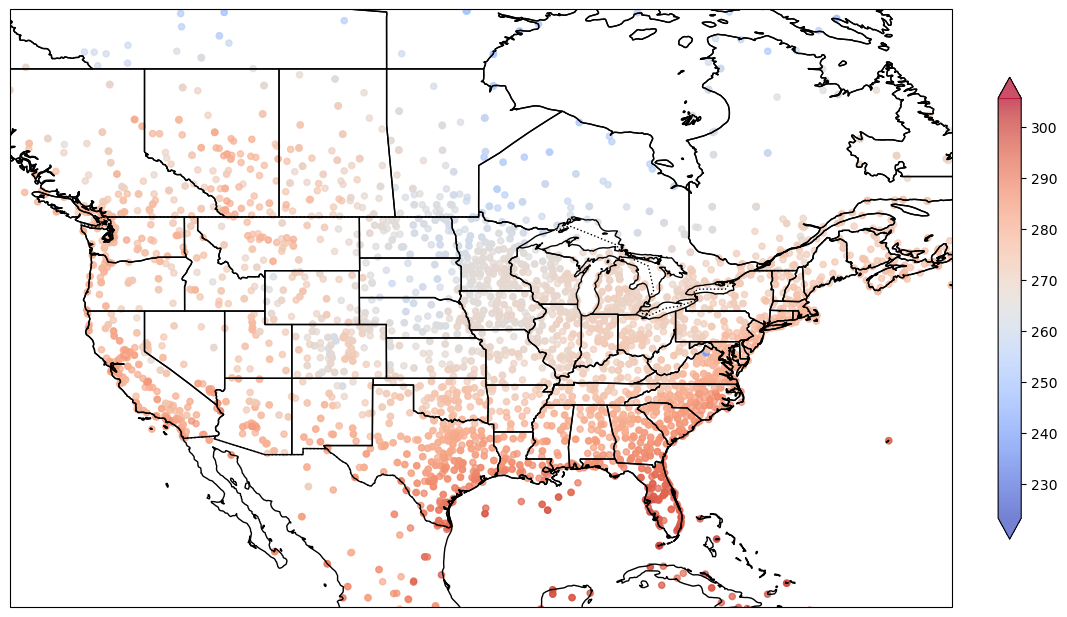

In [19]:
# Create the plot
plt.figure(figsize=(15, 12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')
ax.set_extent([-130, -60, 20, 60])

# Plot the scatter data with smaller and more transparent points
cs = plt.scatter(lons, lats, c=surface_obs, s=20, cmap='coolwarm', alpha=0.7,
                 transform=ccrs.PlateCarree())

# Add a colorbar
cb = plt.colorbar(cs, shrink=0.5, pad=.04, extend='both')

# Display the plot
plt.show()